# Economic Data Analysis

We are going to use the [FRED API](https://fred.stlouisfed.org/docs/api/fred/) to get the data

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fredapi import Fred

# set styles
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
pd.options.display.max_rows = 500

# set up fred api
fred_api_key = os.environ.get('FRED_API_KEY')
# Create a fred object
fred = Fred(api_key=fred_api_key)

Search for a topic in Fred

In [2]:
# search for economic data in fred
sp_search = fred.search('S&P 500', order_by='popularity', limit=1000)
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-01-22,2023-01-22,S&P 500,2013-01-22,2023-01-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-20 19:10:57-06:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-01-22,2023-01-22,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...
MEHOINUSA646N,MEHOINUSA646N,2023-01-22,2023-01-22,Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:03-05:00,62,Household data are collected as of March. As ...
VXVCLS,VXVCLS,2023-01-22,2023-01-22,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-01-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-20 08:36:08-06:00,55,"Copyright, 2016, Chicago Board Options Exchang..."
MEHOINUSCAA646N,MEHOINUSCAA646N,2023-01-22,2023-01-22,Median Household Income in California,1984-01-01,2021-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:03-05:00,51,Household data are collected as of March. As ...


In [3]:
# pull raw data from fred
sp500 = fred.get_series(series_id='SP500')
sp500.head()

2013-01-21        NaN
2013-01-22    1492.56
2013-01-23    1494.81
2013-01-24    1494.82
2013-01-25    1502.96
dtype: float64

In [10]:
# plot sp500 data with plotly
fig = px.line(sp500, title='S&P 500')
fig.show()

Pull and join multiple data series

In [26]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-01-22,2023-01-22,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-01-22,2023-01-22,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,64,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-01-22,2023-01-22,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:25-06:00,63,The series comes from the 'Current Population ...
CAUR,CAUR,2023-01-22,2023-01-22,Unemployment Rate in California,1976-01-01,2022-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-12-19 17:11:02-06:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-01-22,2023-01-22,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...


<AxesSubplot: title={'center': 'Unemployment Rate'}>

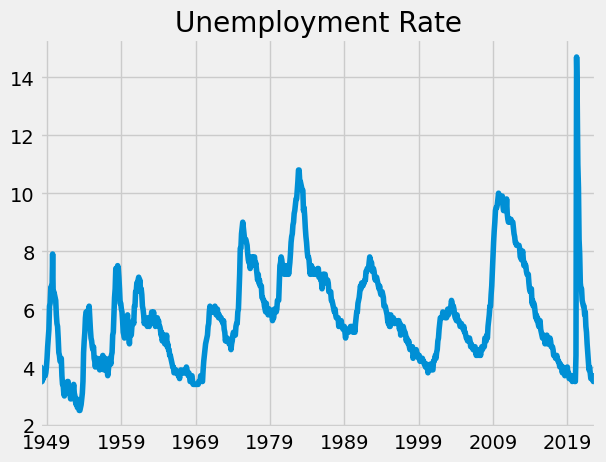

In [16]:
fred.get_series('UNRATE').plot(title='Unemployment Rate')